<a href="https://colab.research.google.com/github/CVH4OYC/ML_lab/blob/main/%D0%9F%D0%BE%D0%BD%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/datasets/voice.csv')

In [4]:
df.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [6]:
vals = df["label"].unique()
vals

array(['male', 'female'], dtype=object)

In [7]:
cols_for_clusters = df.columns[:-1]
cols_for_clusters

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')

In [8]:
df_copy=df.copy()

In [9]:
# кодирование меток числами
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
df_copy[['label']] = encoder.fit_transform(df_copy[['label']])
df_copy.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1.0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1.0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1.0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1.0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1.0


In [10]:
X = df_copy[cols_for_clusters].copy()
y =  df_copy[['label']].values

Нормализация

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=cols_for_clusters)
y =  df_copy[['label']]
X

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,-4.049248,0.427355,-4.224901,-2.576102,-5.693607,-0.214778,2.293306,1.762946,-0.039083,0.471575,-2.141210,-4.049248,-1.812038,-1.097998,0.565959,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772
1,-3.841053,0.611669,-3.999293,-2.486885,-5.588987,-0.258485,4.548056,4.433008,-0.065236,0.594431,-2.141210,-3.841053,-1.079594,-1.091533,-0.294030,-1.561916,-0.708404,-1.418107,-1.405818,-1.014103
2,-3.463066,1.603848,-4.095851,-2.706986,-3.928699,0.909326,6.513656,7.326207,-1.083730,0.398261,-2.141210,-3.463066,-1.365368,-1.100397,0.410480,-1.563866,-0.708404,-1.429203,-1.416917,-1.065344
3,-0.992157,0.899998,-0.759454,-0.901418,-0.711205,0.632690,-0.449858,-0.240099,1.516383,1.797340,-1.054576,-0.992157,-1.666966,-0.988934,-0.294030,-1.195367,-0.708404,-1.273867,-1.261532,0.614286
4,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,1.005588,-0.480911,-0.238940,1.708336,2.114740,-0.790514,-1.530640,-1.127233,-1.034015,0.260185,-0.221660,-0.708404,0.124154,0.136933,0.289046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,-1.638842,1.658182,-0.877839,-1.873163,-0.999378,1.579141,-0.325020,-0.221916,1.507749,1.999883,0.460602,-1.638842,1.237885,2.444087,0.114817,0.007024,-0.708404,-0.237556,-0.224892,-0.098989
3164,-2.162452,1.927682,-2.994482,-2.008095,-0.840021,1.820721,-0.577009,-0.252503,1.458418,1.697831,-1.963949,-2.162452,1.429532,-0.124536,0.565959,0.153573,-0.214641,-0.388453,-0.384717,0.871981
3165,-1.298773,2.322724,-0.051973,-2.199039,-0.017123,2.492666,-0.298044,-0.222108,1.150198,1.385857,-2.037497,-1.298773,2.077781,0.140728,0.565959,-0.637833,-0.708404,-0.599266,-0.586717,0.175887
3166,-1.245202,2.012196,-0.017728,-1.991852,-0.204021,2.153653,-0.365367,-0.231123,1.229850,1.505711,0.607848,-1.245202,0.915445,-0.120678,-0.294030,-0.072080,-0.708404,-0.412863,-0.400255,1.149161


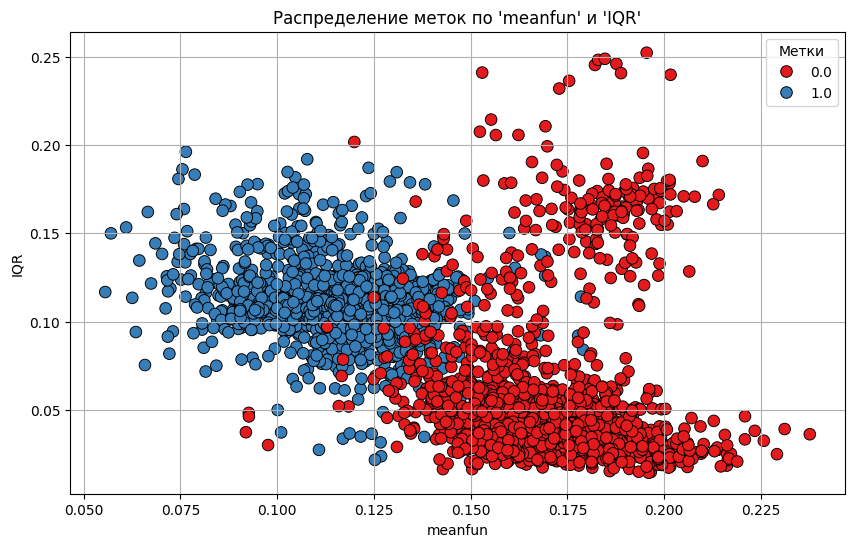

In [12]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_copy, x='meanfun', y='IQR', hue='label', palette='Set1', s=70, edgecolor="k")

plt.title("Распределение меток по 'meanfun' и 'IQR'")
plt.xlabel("meanfun")
plt.ylabel("IQR")
plt.legend(title="Метки")
plt.grid(True)
plt.show()

# PCA

In [13]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

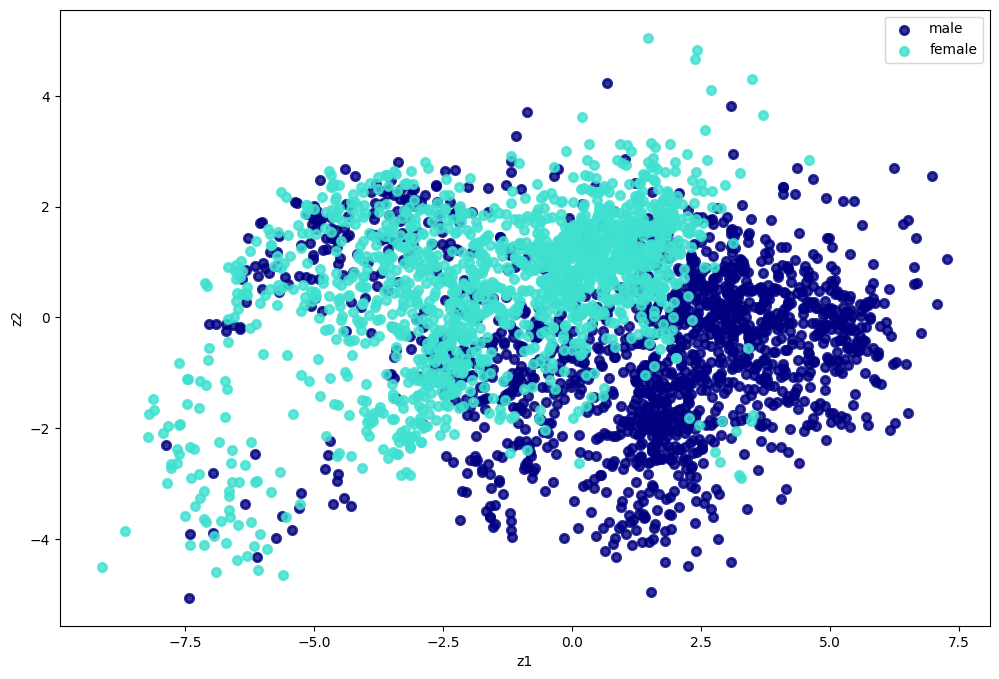

In [14]:
y = df_copy['label'].values
pca = PCA(n_components=2)
X_new = pca.fit(X).transform(X)


plt.figure(figsize=(12,8))
colors = ["navy", "turquoise"]
lw = 2

for color, i, target_name in zip(colors, [0, 1], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

Можно выделить две главные компоненты

In [15]:
pca.explained_variance_ratio_

array([0.45216391, 0.11870609])

# ICA

In [16]:
from sklearn.decomposition import FastICA

fast_ica = FastICA(n_components=2)
X_new = fast_ica.fit_transform(X)

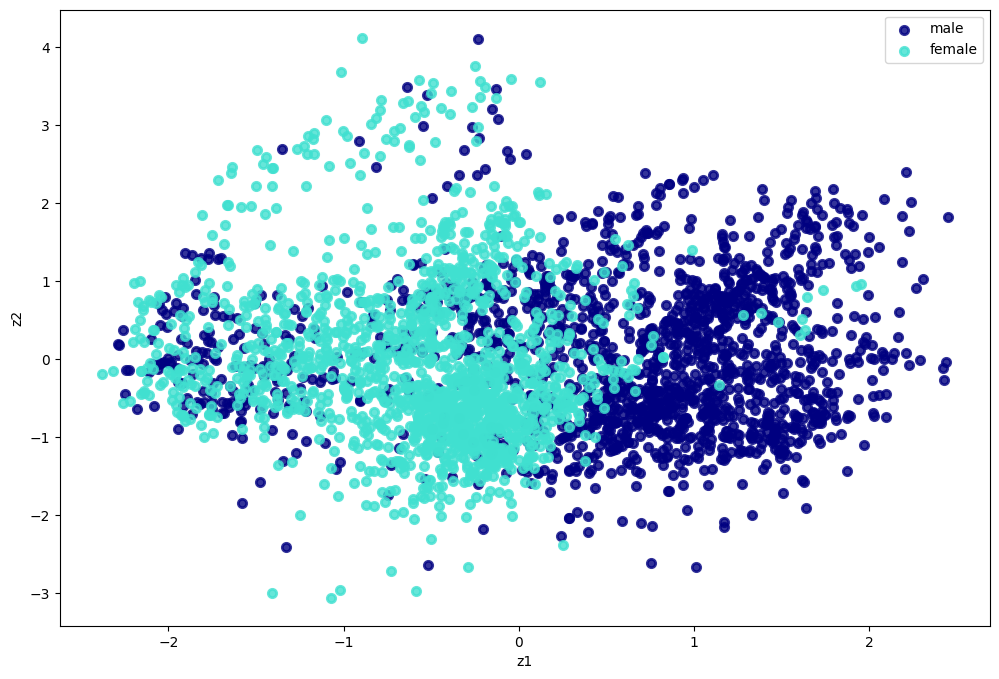

In [17]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise"]
lw = 2

for color, i, target_name in zip(colors, [0, 1], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

Женские голоса более сгруппированы, чем мужские

# Kernel PCA

In [18]:
from sklearn.decomposition import KernelPCA
# Параметр ядра гамма контролирует степень влияния отдельных точек данных
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_new = rbf_pca.fit_transform(X)

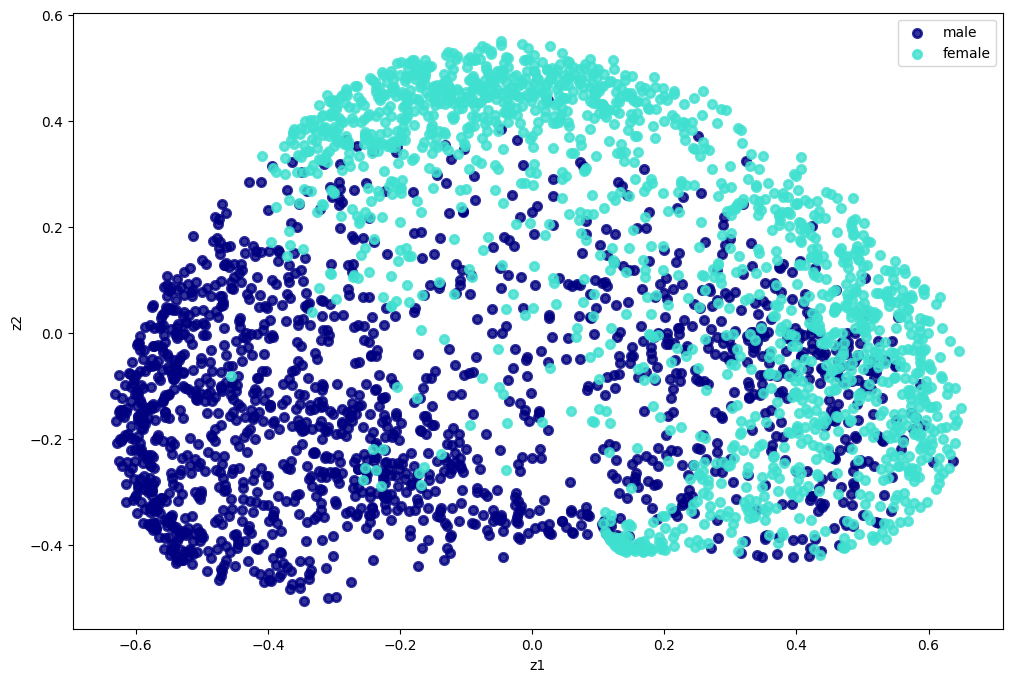

In [19]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise"]
lw = 2

for color, i, target_name in zip(colors, [0, 1], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

# t-SNE

In [20]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_new = tsne.fit_transform(X)

In [21]:
# Вывод результатов
print('Initial Shape of X: ', X.shape)
print('New Shape of X: ', X_new.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)

Initial Shape of X:  (3168, 20)
New Shape of X:  (3168, 2)
Kullback-Leibler divergence after optimization:  1.032034993171692
No. of iterations:  999


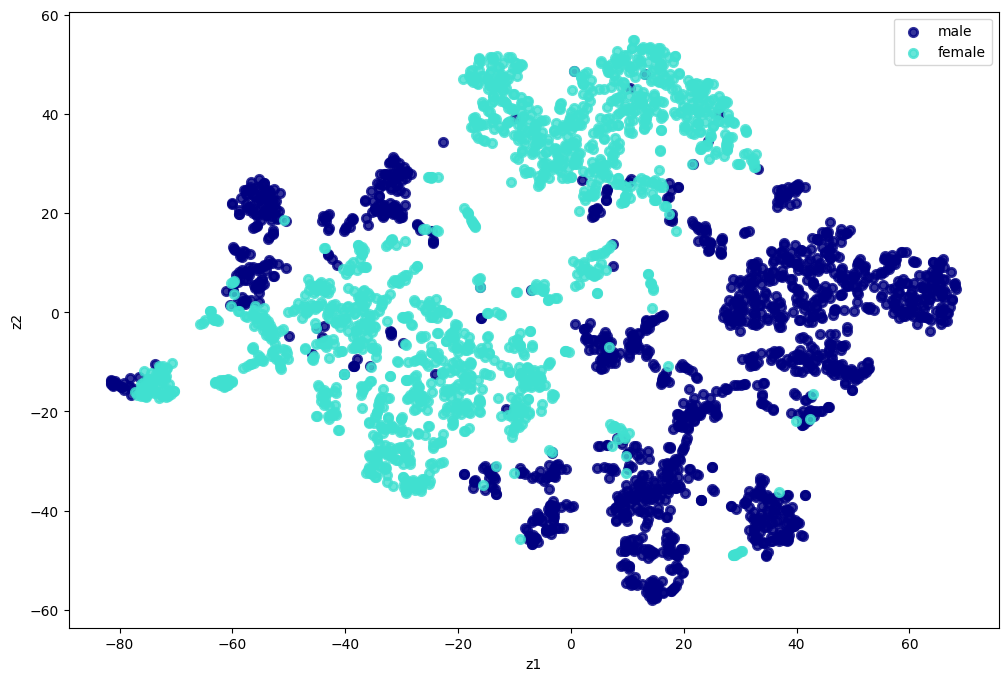

In [22]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

DBSCAN

In [23]:
from sklearn.neighbors import NearestNeighbors

min_samples = 21

knn = NearestNeighbors(n_neighbors = min_samples, metric = 'l2')
knn.fit(X)

dists, inds = knn.kneighbors(X)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()

In [24]:
import sklearn
#возможные метрики расстояния
sklearn.metrics.pairwise.distance_metrics()

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

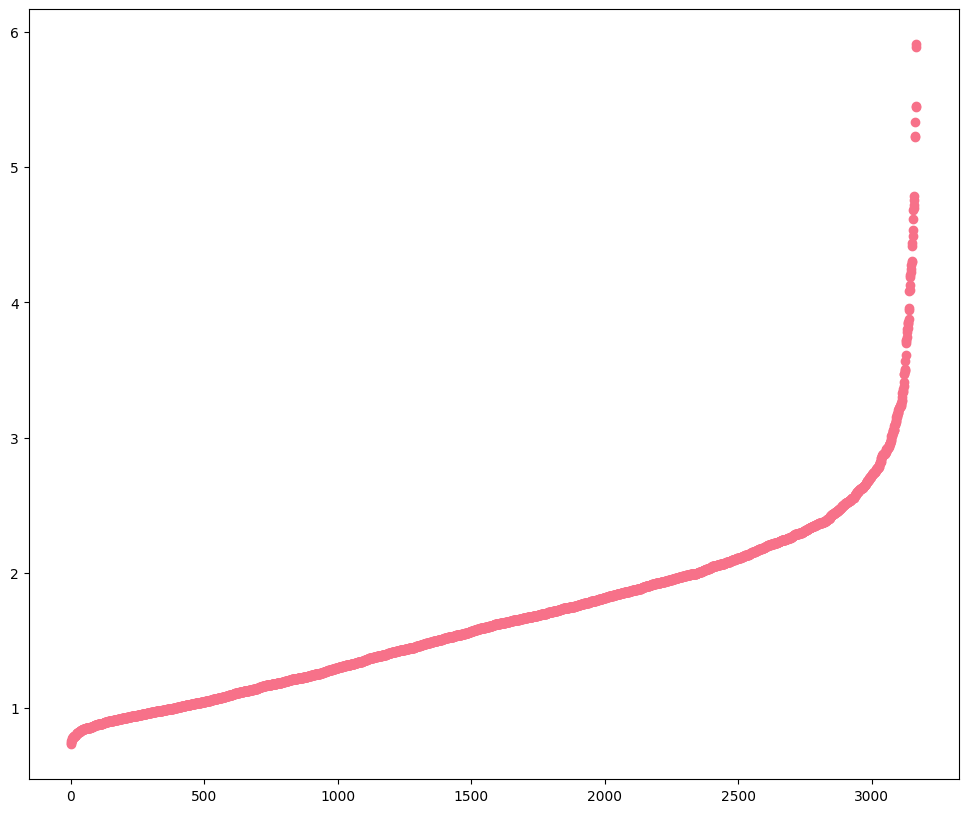

In [36]:
plt.figure(figsize=(12,10))
plt.scatter(x = range(len(dists_ar)), y=dists_ar)

plt.show()

Оптимальным eps будет 3

In [26]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [37]:
dbscan_cluster1 = DBSCAN(eps = 3, min_samples = 21)
X_new = dbscan_cluster1.fit(X)

In [38]:
# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 1
Estimated no. of noise points: 65
v_measure = 0.0010633709673522835


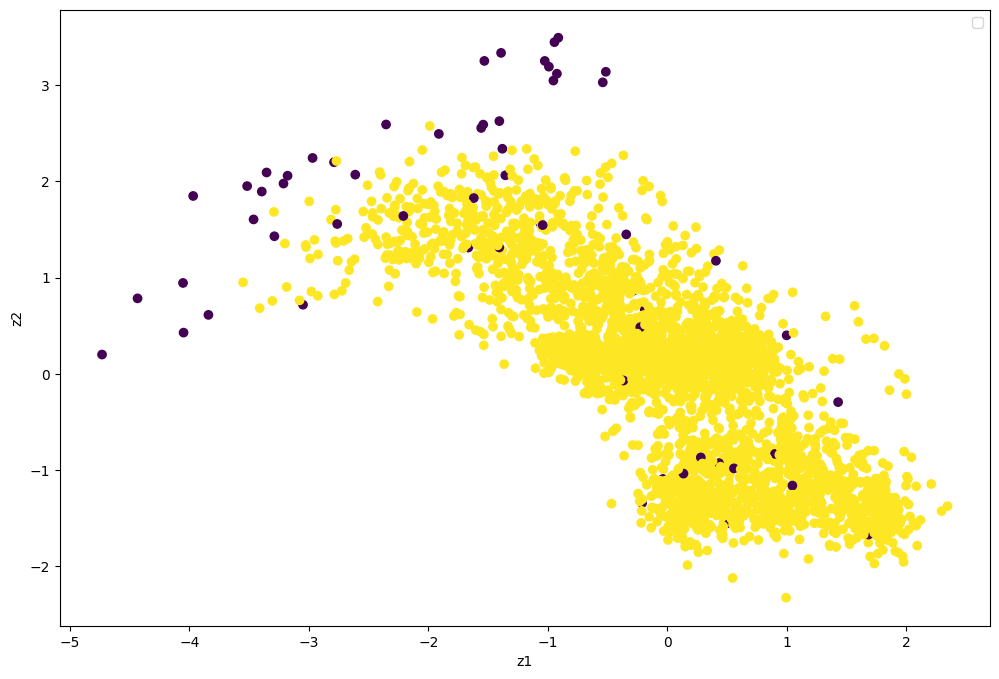

In [39]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise"]
lw = 2

plt.scatter(
        X[cols_for_clusters[0]], X[cols_for_clusters[1]],c=dbscan_cluster1.labels_
    )

plt.legend(loc="best", shadow=False, scatterpoints=2)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

Несмотря на оптимально подобранный eps, DBSCAN выделил только один кластер

Выделение выбросов красным цветом

In [41]:
dbscan = DBSCAN(eps = 3, min_samples = 21)
print(dbscan)

DBSCAN(eps=3, min_samples=21)


In [42]:
pred = dbscan.fit_predict(X)

In [43]:
# Number of Clusters
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 1
Estimated no. of noise points: 65
v_measure = 0.0010633709673522835


In [44]:
# у анномалий - класс -1, ищем все номера строк с таким классом, потом отбираем эти строки из начального набора данных

anom_index = [i for i in range(len(pred)) if pred[i] == -1]
values = X.loc[anom_index]

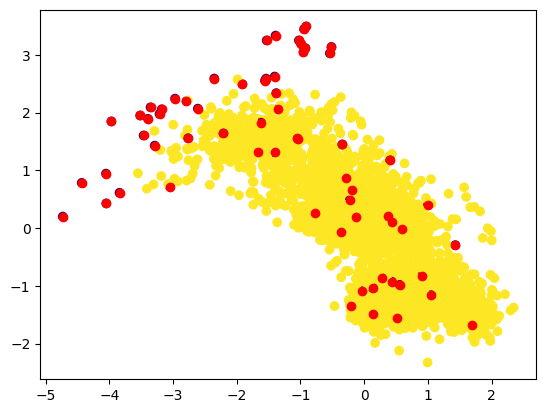

In [45]:
plt.scatter( X[cols_for_clusters[0]], X[cols_for_clusters[1]],c=dbscan_cluster1.labels_)
plt.scatter(values[cols_for_clusters[0]], values[cols_for_clusters[1]], color='r')
plt.show()

Скорее всего данный датасет не является оптимальным для работы с DBSCAN